In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Customer_churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploratory Data Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
# We have blank spaces in totalcharges column so replace it with 0(tenure is also 0) also covert data type to float (this observation came from excel file)

df['TotalCharges'] = df['TotalCharges'].replace(" ","0")
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [20]:
df.shape

(7043, 21)

In [22]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [26]:
df.isnull().sum().sum() # overall sum of null

0

In [24]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [32]:
df.duplicated().sum()

0

In [34]:
df['customerID'].duplicated().sum()  #check dup[licates in unique columns also

0

In [36]:
# covert 1/0 to yes/no for easy understanding

def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

In [38]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


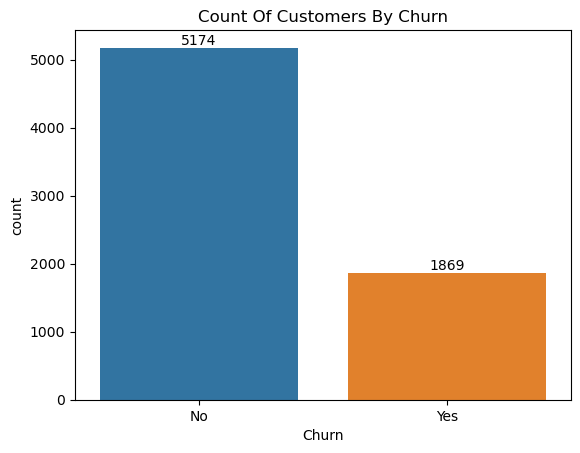

In [78]:
ax = sns.countplot(x= df['Churn'], data=df)
ax.bar_label(ax.containers[0])   #to get count on each bar
plt.title('Count Of Customers By Churn')
plt.show()

In [46]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

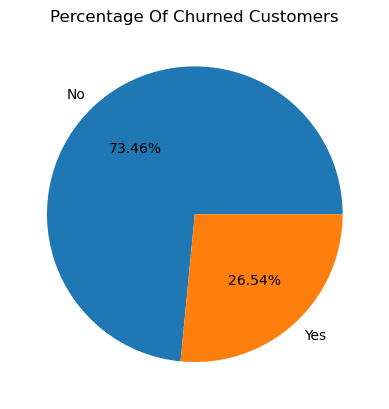

,Churn
Churn,
No,5174
Yes,1869


In [76]:
gb = df.groupby('Churn').agg({'Churn':'count'})
plt.pie(gb['Churn'], labels=gb.index, autopct= '%1.2f%%')
plt.title('Percentage Of Churned Customers')
plt.show()
gb

##from the given pie chart we can conculde that 26.54% of our customer churned out
##now lets explore the reasons behind it

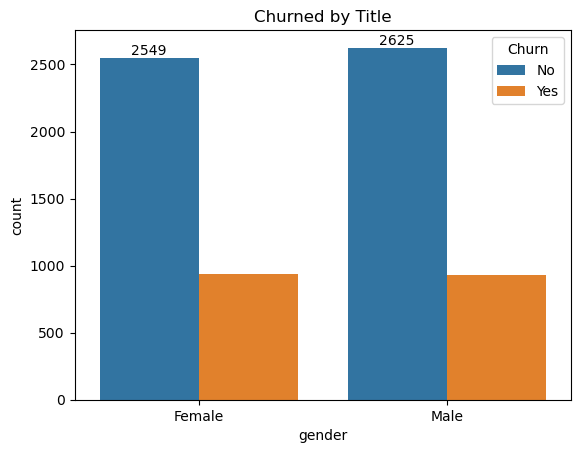

In [94]:
ax = sns.countplot(x = 'gender', data= df, hue='Churn')
ax.bar_label(ax.containers[0])
plt.title('Churned by Title')
plt.show()

In [90]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [96]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [110]:
df['SeniorCitizen'].value_counts()

no     5901
yes    1142
Name: SeniorCitizen, dtype: int64

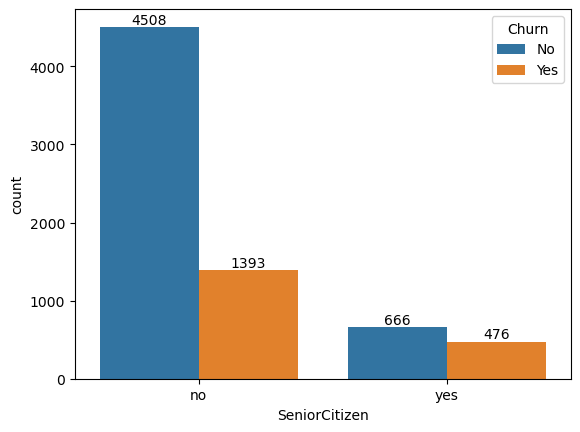

In [102]:
ax = sns.countplot(x='SeniorCitizen', data=df, hue='Churn')

# Annotate bars with counts
for container in ax.containers:
    ax.bar_label(container, label_type='edge')  # Add count labels to each bar

# Show the plot
plt.show()

#above graph shows that out of 1142 senior citizen 476 are churned almost 41%

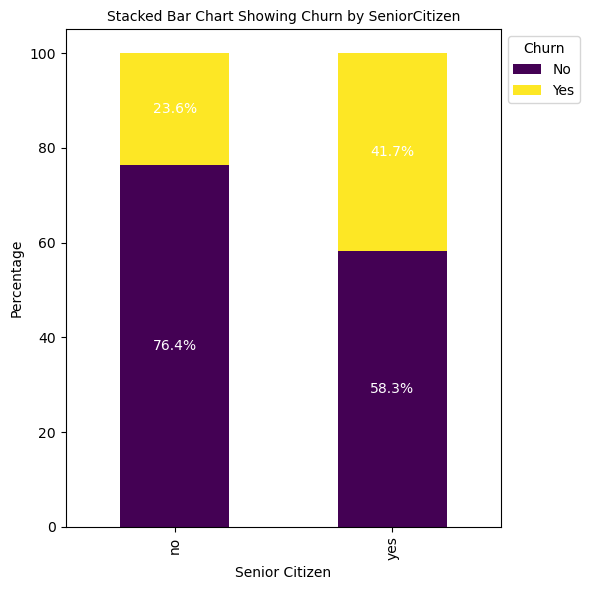

In [120]:
## asked chatgpt to do this , following code is taken from chatgpt to product stcakde bar chart

grouped = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Step 2: Create stacked bar chart
ax = percentages.plot(kind='bar', stacked=True, figsize=(6, 6), colormap='viridis')

# Step 3: Add percentage labels
for i, bar_group in enumerate(ax.containers):
    for bar in bar_group:
        # Get the height and value
        height = bar.get_height()
        if height > 0:  # Avoid placing labels on zero-height bars
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # X-coordinate
                bar.get_y() + height / 2,           # Y-coordinate
                f'{height:.1f}%',                  # Text to display (percentage)
                ha='center', va='center', fontsize=10, color='white'
            )

# Step 4: Customize the chart
plt.title('Stacked Bar Chart Showing Churn by SeniorCitizen', fontsize=10)
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Step 5: Show the plot
plt.show()

#above observation shows that senior citizen are more likely to churned than younger users

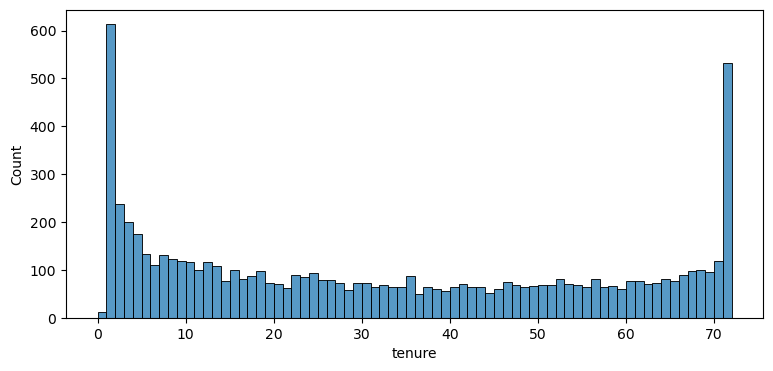

In [133]:
plt.figure(figsize=(9,4))
sns.histplot(x = 'tenure',data=df, bins=72) # tenure mean how many months user take services
plt.show()

#abve observation shows that user who use serivices for long time, they have stayed but people who have used services less than 1 or 2 month, churned out
#simply churned more likely to happen in initail months

In [138]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

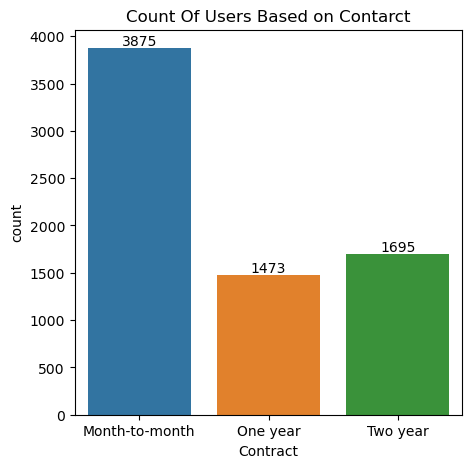

In [160]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x= 'Contract', data=df)
ax.bar_label(ax.containers[0])
plt.title('Count Of Users Based on Contarct')
plt.show()

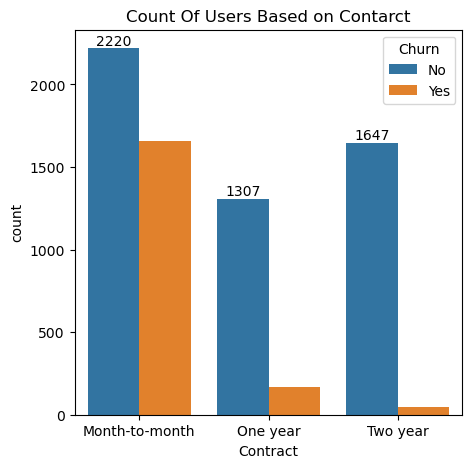

In [162]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x= 'Contract', data=df,hue='Churn')
ax.bar_label(ax.containers[0])
plt.title('Count Of Users Based on Contarct')
plt.show()

#above fig shoows that users with small contarct which is m-t-m are more likely to churned out comparatively other contarct 
#may be the users does not satisfy with services and thats the reason why they are not taking next plans or contarcts.
#may be we focus on while new customer came convince him/her to take longer plans but htis is not the efficient way to maximize or enhance customer service

In [166]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

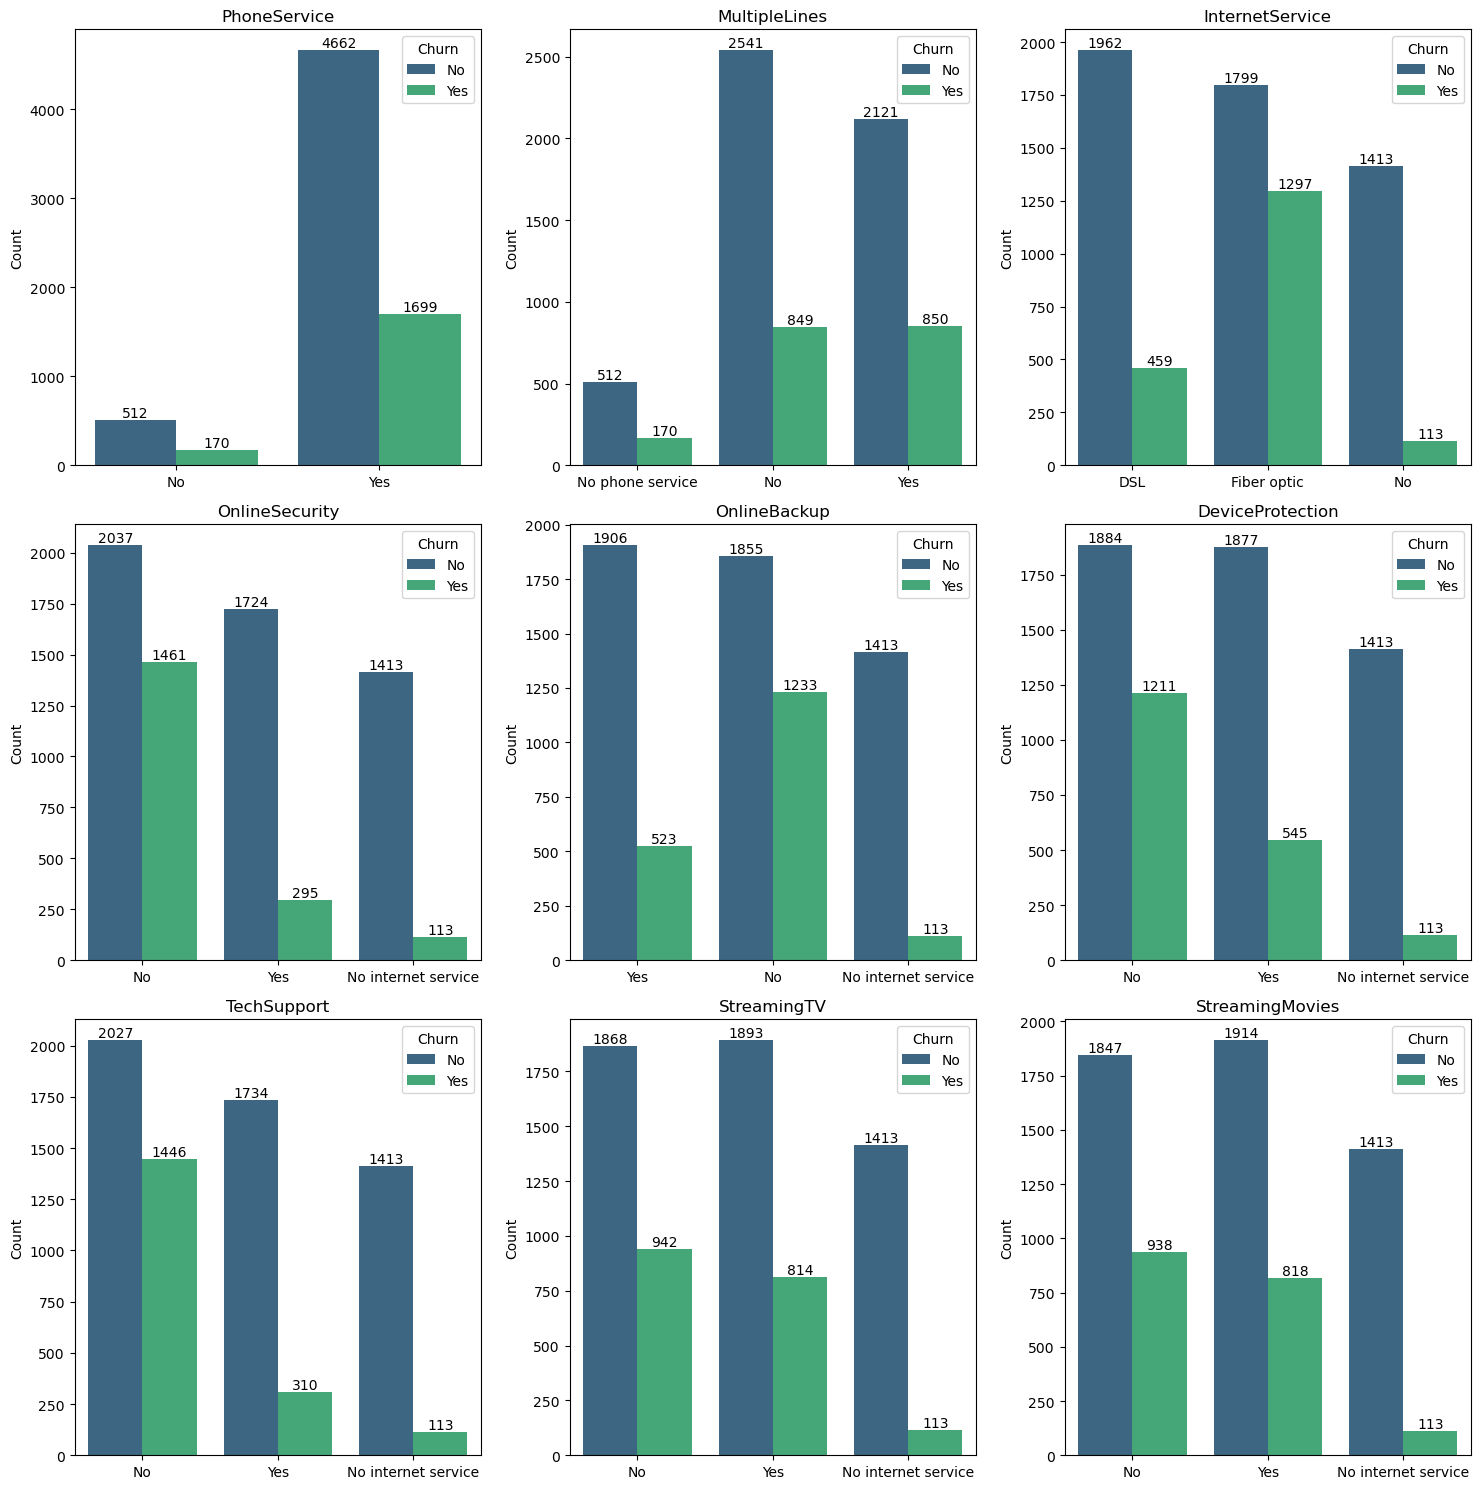

In [170]:
## this code is taken from chatGPT

columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies'
]

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))  # Adjust rows/cols based on number of columns
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

# Plot each column
for i, column in enumerate(columns):
    ax = axes[i]
    sns.countplot(x=column, data=df, ax=ax, palette="viridis", hue='Churn')
    
    # Add count labels to bars
    for container in ax.containers:
        ax.bar_label(container)
    
    # Set title and adjust labels
    ax.set_title(column, fontsize=12)
    ax.set_xlabel("")
    ax.set_ylabel("Count")

# Remove unused subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

#PhoneService: Most customers use the service, with a lower churn rate for those subscribed.
#InternetService: Fiber optic users have a higher churn rate compared to DSL or no internet service.
#OnlineSecurity & TechSupport: Customers without these services show higher churn, indicating their potential role in retention.
#Streaming Services: Churn is more evenly distributed, suggesting less impact on customer decisions.

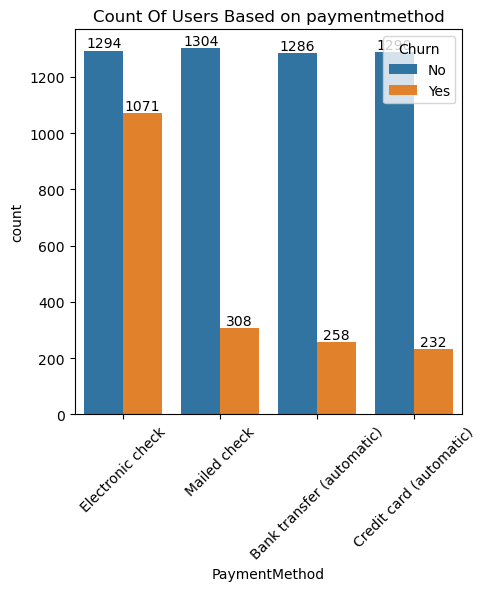

In [181]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x= 'PaymentMethod', data=df,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Count Of Users Based on paymentmethod')
plt.xticks(rotation=45)
plt.show()

#custmer is likely to churned when he is using electronic as a payemt mehtoid